<a href="https://colab.research.google.com/https://github.com/dml-book/dml/blob/main/Chapter%201/k_nearest_neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-найближчі сусіди (k-Nearest Neighbors, kNN)

**kNN** &mdash; це **контрольований** алгоритм машинного навчання, який може використовуватись як для класифікації, так і для регресії. kNN є алгоритмом навчання на основі екземплярів, тобто увесь навчальний набiр даних використовується як частина моделi. Для передбачення мiтки вхiдного прикладу, алгоритм kNN розглядає його окiл у просторi векторiв ознак i виводить мiтку, що зустрiчається у цьому околi найчастiше. Отже, замість того, щоб просто вивчити оптимальну конфігурацію параметрів моделі, потрібно також зберігати у пам'яті усі навчальні приклади та виконати прогноз, використовуючи показник подібності.

**Дано:**

- Навчальний набір: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - де $\boldsymbol{X}^{(i)}$ &mdash;  $i$-й вектор ознак (екземпляр). Є $m$-вимірним вектором $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; загальна кількість навчальних прикладів
  - $y^{(i)}$ &mdash; цільове значення $i$-го навчального прикладу

Для деякого вхідного прикладу, kNN отримує з пам'яті k найбільш подібних екземплярів. Подібність визначається з точки зору відстані, тобто потрібно знайти k навчальних екземплярів, які будуть мати найменшу відстань (наприклад, евклідову) до вхідного прикладу.

Відстань $d_i$ між вхідним прикладом $\boldsymbol{X}$ та $i$-м навчальним екземпляром $\boldsymbol{X}^{(i)}$:
$$
d_i = \sqrt{\sum_{j=1}^{m} \big ( x_j - x^{(i)}_{j} \big )^2}
$$

Вага $w_i$ призначена $i$-му сусіду, може бути обчислена як величина, обернена відстані:
$$
w_i = \frac{1}{d_i + \epsilon}
$$

де $\epsilon$ &mdash; мала константа для уникнення ділення на нуль.

Цільове значення (мітку) вхідного прикладу можна предбачити за допомогою таких підходів:  
  
Класифікація:  

1.  **незважений (unweighted)**: виводить мітку, що зустрічається найчастіше серед k-найближчих сусідів
2.  **зважений (weighted)**: обчисліть ваги k-найближчих сусідів для кожного класифікаційного значення, виводить клас з найбільшою вагою

  
Регресія:


1.   **незважений (unweighted)**: виводить середнє значення k-найближчих сусідів
2.   **зважений (weighted)**: потрібно розрахувати середньозважене значення міток для $k$ найближчих сусідів:

$$
\hat{y} = \frac{\sum_{i=1}^{k} w_i y^{(i)}}{\sum_{i=1}^{k} w_i}
$$

де $\hat{y}$ &mdash; передбачення.


Нижче потрібно реалізувати базову незважену версію алгоритму kNN для класифікації рукописних цифр з набору даних sklearn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

##Набір даних

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


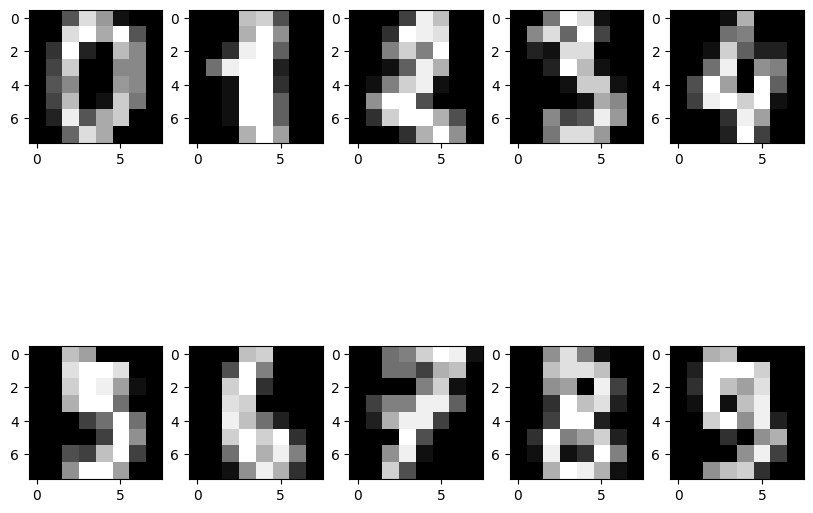

In [ ]:
# Для прикладу будемо використовувати набір даних рукописних цифр. Він складається з 1797 зображень.
# Кожне зображення представлене 64-вимірним вектором, який містить інформацію про значення пікселів зображення.

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Приклад цифр
fig = plt.figure(figsize=(10,8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap='gray')

plt.show()

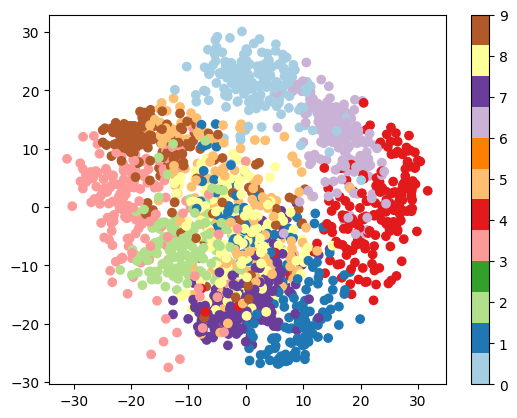

In [ ]:
plt.figure()
pca = PCA(n_components=2)
proj = pca.fit_transform(X)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [ ]:
class kNN():
  def __init__(self):
    pass

  def fit(self, X, y):
    self.data = X
    self.targets = y

  # TODO
  def euclidean_distance(self, X):
    """
    Обчислює евклідову відстань між навчальними даними та
    новим вхідним прикладом або матрицею вхідних прикладів X
    """
    # вхід: один приклад
    if X.ndim == 1:
      # BEGIN_YOUR_CODE

      # END_YOUR_CODE

    # вхід: кілька прикладів (матриця)
    if X.ndim == 2:
      n_samples, _ = X.shape
      # BEGIN_YOUR_CODE

      # END_YOUR_CODE

    return np.array(l2)

  def predict(self, X, k=1):
    """
    Прогноз класу для вхідного прикладу або матриці вхідних прикладів X
    """
    # крок 1: обчислення відстані між вхідними та навчальними даними
    dists = self.euclidean_distance(X)

    # крок 2: знайти k найближчих сусідів та їх категорію (клас)
    if X.ndim == 1:
      if k == 1:
        # BEGIN_YOUR_CODE

        raise Exception("Not implemented yet")
        # END_YOUR_CODE
      else:
        # BEGIN_YOUR_CODE

        raise Exception("Not implemented yet")
        # END_YOUR_CODE

    if X.ndim == 2:
      knn = np.argsort(dists)[:, :k]
      y_knn = self.targets[knn]
      if k == 1:
        # BEGIN_YOUR_CODE

        raise Exception("Not implemented yet")
        # END_YOUR_CODE
      else:
        # BEGIN_YOUR_CODE

        raise Exception("Not implemented yet")
        # END_YOUR_CODE

## Ініціалізація та навчання моделі

In [ ]:
knn = kNN()
knn.fit(X_train, y_train)

print("Тестування для одного вхідного прикладу, k=1")
print(f"Передбачена мітка: {knn.predict(X_test[0], k=1)}")
print(f"Істинна мітка: {y_test[0]}")
print()
print("Тестування для одного вхідного прикладу, k=5")
print(f"Передбачена мітка: {knn.predict(X_test[40], k=5)}")
print(f"Істинна мітка: {y_test[40]}")
print()
print("Тестування для 10 вхідних прикладів, k=1")
print(f"Передбачені мітки: {knn.predict(X_test[10:20], k=1)}")
print(f"Істинна мітка: {y_test[10:20]}")
print()
print("Тестування для 10 вхідних прикладів, k=4")
print(f"Передбачена мітка: {knn.predict(X_test[10:20], k=6)}")
print(f"Істинна мітка: {y_test[10:20]}")
print()

Тестування для одного вхідного прикладу, k=1
Передбачена мітка: 3
Істинна мітка: 3

Тестування для одного вхідного прикладу, k=5
Передбачена мітка: 0
Істинна мітка: 0

Тестування для 10 вхідних прикладів, k=1
Передбачені мітки: [[0 0 5 1 6 0 3 1 0 6]]
Істинна мітка: [0 0 5 1 6 0 3 1 0 6]

Тестування для 10 вхідних прикладів, k=4
Передбачена мітка: [0, 0, 5, 1, 6, 0, 3, 1, 0, 6]
Істинна мітка: [0 0 5 1 6 0 3 1 0 6]



## Точність на тестовому наборі

In [ ]:
# Compute accuracy on test set
y_p_test1 = knn.predict(X_test, k=1)
test_acc1= np.sum(y_p_test1[0] == y_test)/len(y_p_test1[0]) * 100
print(f"Test accuracy with k = 1: {format(test_acc1)}")

y_p_test5 = knn.predict(X_test, k=3)
test_acc5= np.sum(y_p_test5 == y_test)/len(y_p_test5) * 100
print(f"Test accuracy with k = 5: {format(test_acc5)}")

Test accuracy with k = 1: 97.77777777777777
Test accuracy with k = 5: 97.55555555555556


## Переваги


- Програмна реалізація алгоритму відносно проста.                      
- Результат роботи алгоритму легко піддається інтерпретації. Зрозуміла логіка роботи алгоритму, яка заснована на пошуку схожих об'єктів.         


## Недоліки

- Набір даних, який використаний для алгоритму, повинний бути репрезентативним.
- Модель не можна "відокремити" від даних: для класифікації нового прикладу потрібно використовувати всі навчальні приклади. Ця особливість сильно обмежує використання алгоритму.